In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100
1508,29/12/2017,1046.719971,1049.699951,1044.900024,1046.400024,887500


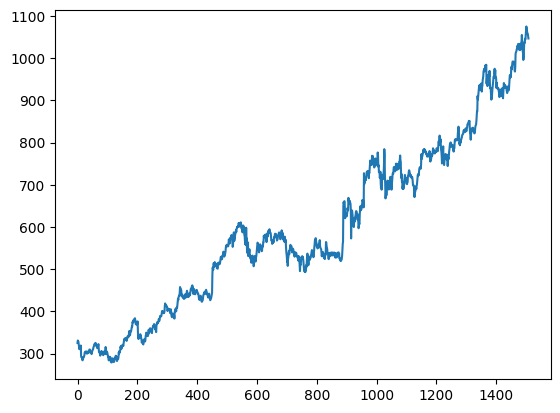

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.plot(df.Open)

In [ ]:
df1=df.Open
type(df1)

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1509, 1)

In [ ]:
print(df1)

[[0.05794644]
 [0.0655085 ]
 [0.06369963]
 ...
 [0.97762796]
 [0.97035477]
 [0.96422472]]


In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [ ]:
training_size,test_size

(1131, 378)

In [ ]:
import numpy

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    l = len(dataset)-time_step-1

    for i in range(l):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape[0]

1030

In [ ]:
X_train.shape

(1030, 100)

In [ ]:
X_test.shape

(277, 100)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=128,verbose=1)

Epoch 1/25
9/9 [==============================] - 2s 245ms/step - loss: 7.1218e-04 - val_loss: 0.0021
Epoch 2/25
9/9 [==============================] - 2s 233ms/step - loss: 6.8556e-04 - val_loss: 0.0016
Epoch 3/25
9/9 [==============================] - 2s 233ms/step - loss: 6.5659e-04 - val_loss: 0.0018
Epoch 4/25
9/9 [==============================] - 2s 237ms/step - loss: 6.5542e-04 - val_loss: 0.0018
Epoch 5/25
9/9 [==============================] - 3s 339ms/step - loss: 6.6159e-04 - val_loss: 0.0030
Epoch 6/25
9/9 [==============================] - 2s 228ms/step - loss: 6.6920e-04 - val_loss: 0.0022
Epoch 7/25
9/9 [==============================] - 2s 233ms/step - loss: 6.3996e-04 - val_loss: 0.0027
Epoch 8/25
9/9 [==============================] - 2s 233ms/step - loss: 6.5060e-04 - val_loss: 0.0026
Epoch 9/25
9/9 [==============================] - 2s 232ms/step - loss: 6.5092e-04 - val_loss: 0.0014
Epoch 10/25
9/9 [==============================] - 2s 268ms/step - loss: 6.2412e-0

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 36ms/step


In [ ]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

561.1311579048784

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

916.2208456361514

In [ ]:
len(test_data)

378

In [ ]:
x_input=test_data[277:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(len(temp_input))

101


In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<10):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))

        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))

        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())  # to add prediction in new list
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)  #, verbose=0
        print('predicted value is',yhat[0])
        temp_input.extend(yhat[0].tolist())
        print('length of temp input is',len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



0 day input [0.805811   0.80196717 0.78993318 0.80822288 0.81035828 0.8116898
 0.81230538 0.79287262 0.79248322 0.79589992 0.80746914 0.81592304
 0.80942874 0.80002015 0.78632803 0.80510756 0.81981717 0.83158734
 0.8214753  0.81779477 0.81977944 0.82575876 0.82294498 0.8208598
 0.81843535 0.81917652 0.81089842 0.80505734 0.80180387 0.80878809
 0.82137479 0.81477997 0.81189083 0.80971763 0.8147674  0.83187623
 0.84524174 0.85526583 0.84775405 0.85152251 0.84962571 0.86370723
 0.88041408 0.88041408 0.87252539 0.88977245 0.89548795 0.89561353
 0.89333989 0.89519906 0.88795101 0.89227219 0.89237271 0.86785253
 0.86580499 0.88041408 0.91708126 0.92312336 0.92465583 0.92715565
 0.93287114 0.93331076 0.94195312 0.93979257 0.94387507 0.94823389
 0.93877501 0.93495632 0.93391377 0.92966796 0.93382583 0.94825904
 0.93098691 0.93481816 0.94950262 0.95059547 0.9557834  0.97473874
 0.95914996 0.93363737 0.92538443 0.92144008 0.9004372  0.90742142
 0.93120043 0.95263043 0.9501307  0.95531863 0.96347

In [ ]:
print('predicted val for next 10 days',lst_output)

predicted val for next 10 days [[0.9693511128425598], [0.9704236388206482], [0.9708194136619568], [0.9706929922103882], [0.9701874852180481], [0.9694219827651978], [0.9684896469116211], [0.9674588441848755], [0.9663767218589783], [0.9652739763259888]]


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1509

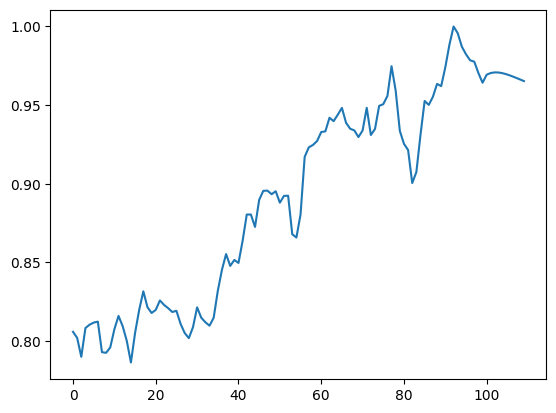

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1409:])